# Lecture 15 - Sorting

## Overview, Objectives, and Key Terms
 
In this lecture and [Lecture 14](ME400_Lecture_14.ipynb), we tackle two of the most important practical problems in computing: *searching* and *sorting*.  In this lecture, we turn to *sorting*, the more challenging problem and one that was a focus of much research in the early years of computing for making searching easier.  We'll flex our knowledge of functions to help write clean and clear sorting programs.

### Objectives

By the end of this lesson, you should be able to

- Sort an array of numbers using brute-force, $\mathcal{O}(n^2)$ schemes like *selection sort*.
- Sort an array of numbers using divide-and-conquer, $\mathcal{O}(n\log n)$ schemes like *merge sort*.
- Apply built-in Python functions to sort sequences.

### Key Terms

- selection sort
- stable sorting algorithm
- merge sort
- merge 

## Sorting is Hard Work

Sorting a sequence of randomly arranged items is no easy task, often resulting in a lot of repetive motions and paper cuts (if the items are, e.g., student exams).  However, computers are great for such repetition, and they don't seem to suffer those paper cuts.  The question is: *how to sort*?  Sorting, it turns out, presents a rich opportunity for integrating much of the material covered so far.

The simplest sorting algorithm is based on brute force and leverages the solution to a problem encountered as early as [Lecture 5](ME400_Lecture_5.ipynb): finding the minimum value of a sequence of numbers.  The basic idea is simple.  Given a sequence of $n$ numbers to sort in increasing order, we 

1. Find the smallest value (just as we have previously done).
2. Swap it with the first element in the sequence.
3. Repeat steps (1) and (2) this process for the last $n-1$ items in the sequence.

This algorithm is known as [selection sort](https://en.wikipedia.org/wiki/Selection_sort).  In more detailed pseudocode, **selection sort** can be written as

```
'''The selection sort algorithm to sort an array'''
Input: a, n # sequence of numbers and its length
# Loop through each element a[i] 
Set i = 0
While i < n do
   # Find the location k of the smallest element after a[i]
   Set j = i + 1
   Set k = i
   While j < n do
       If a[j] < a[k] then
           Set k = j
       Set j = j + 1
   # Switch the values of a[i] and a[k], putting them in order
   Swap a[i] and a[k]
   i = i + 1
```

Take some time and digest this algorithm.  Then try the following exercises:

> **Exercise**: Apply this algorithm to the sequence [5, 3, 7].  For each value of `i` and `j`, write out, using pen and paper, the values of `i`, `j`, `k`, `a[i]`, `a[j]`, `a[k]`, `a[j] < a[k]`, and `a` *before* the conditional statement.
>> *Solution*:  
```
i    j    k    a[i]    a[j]    a[k]   a[j] < a[k]    a
-------------------------------------------------------------
0    1    0     5       3       5        True       [5, 3, 7]
0    2    1     5       7       3        False      [5, 3, 7] 
1    2    1     5       7       5        False      [3, 5, 7]
2    3    2     7      N/A      7        N/A        [3, 5, 7] 
```

> **Exercise**: Repeat the above exercise for the sequence [4, 1, 8, 2, 3].

> **Exercise**: What happens to `a[i]` if `a[j]` is never less than `a[k]`?  

> **Exercise**: Produce a flowchart for this algorithm.

> **Exercise**: Apply this algorithm to the sequence [3, 1$_0$, 4, 1$_1$, 2].  Here, the subscript is used to count the number of times a 1 appears in the sequence.  Does the algorithm produce [1$_0$, 1$_1$, 2, 3, 4] or [1$_1$, 1$_0$, 2, 3, 4]?  A sorting algorithm is **stable** if it preserves the original order of equal values (i.e., 1$_0$ and then 1$_1$).


Let's put this to practice using Python.  Because sorting is something to be done for any array, it makes sense to implement the algorithm as a function:

In [15]:
def selection_sort(a):
    """Applies the selection sort algorithm to sort the sequence a."""
    i = 0
    while i < len(a):
        j = i + 1
        k = i
        while j < len(a):
            if a[j] < a[k]:
                k = j
            j += 1
        a[i], a[k] = a[k], a[i]
        i += 1
    return a

In [16]:
selection_sort([5, 3, 7])

[3, 5, 7]

In [17]:
selection_sort([5, 4, 3, 2, 1])

[1, 2, 3, 4, 5]

Download this notebook or copy the function above into your own Python file.  Then tackle the following:

> **Exercise**:  Define `x = [5, 3, 7]` and execute `y = selection_sort(x)`.  Print both `a` and `b`.  Why are they the same?  In other words, why is `a` also sorted?
>> *Solution*: Remember, `y = x` does not produce a copy of `x`.  Rather, `x` and `y` are now just two names for the same data.  Similarly, when `x` is passed to `selection_sort`, it is given the new name `a` within the function, and any changes to `a` lead to changes in `x`.  Because `a` is returned and assigned to `y`, `y` and `x` are two names for the same (now sorted) `list`.

> **Exercise**:  Define `x = (5, 3, 7)` and execute `y = selection_sort(x)`.  Why does it fail?

> **Exercise**:  Modify `selection_sort` so that it sorts and returns a *copy* of `a`, making it suitable for sorting `tuple` variables.

> **Exercise**:  Modify `selection_sort` so that it optionally sorts a sequence in decreasing order.  The function `def` statement should look like `def selection_sort(a, increasing=True):`.
>> *Solution*: A one-line change is to switch `a[j] < a[k]` with `a[j] < a[k] if increasing else a[k] < a[j]`.  Revisit [Lecture 6](ME400_Lecture_6.ipynb) for more tertiary `if` statements of the form `a if b else c`.  Verify this works!

> **Exercise**: Modify `selection_sort` so that it uses `for` loops instead of `while` loops.  Check your result against the version provided above.

> **Exercise**:  Could `while i < len(a)` be changed to `while i < len(a) - 1`?  Why or why not?
>> *Solution*.  Yes!  Doing so would skip the loop when `a` has a single element, for which sorting is not required anyway.

So what's the *order*  of this algorithm?  In other words, given a sequence of $n$ elements, how many comparisons must be made?  

Let's break it down a bit.  The algorithm is comprised of two loops.  The first one must go through all the elements of `a`.  For each value of `i`, the second loop makes `n - i` comparisons.  In other words, we have something like 
```
i     # comparisons
-------------------
0       n
1       n - 1
2       n - 2
...     ...
n - 3   3
n - 2   2
n - 1   1
```

That total looks an awful lot like $1 + 2 + \ldots + (n - 1) + n$, and that sum is $n(n+1)/2 = n^2/2 + n/2$.  Because $n \ll n^2$ for large $n$, the algorithm is $\mathcal{O}(n^2)$.  That's expensive, and for large sequences, we could wait a long, long time for the sort to finish. 

Let's verify that selection sort is $\mathcal{O}(n^2)$ by performing a little experiment.  As done in [Lecture 14](ME400_Lecture_14.ipynb) to assess the linear search, we can generate random sequences of different sizes using NumPy.  Then, we can sort them with selection sort and time how long it takes to do so for each size.

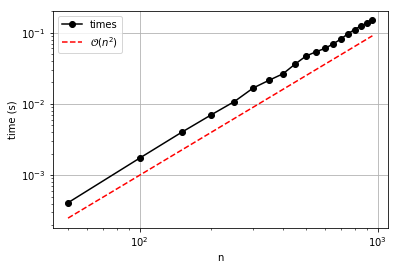

In [43]:
"""Program to show time as a function of size for selection sort."""
from time import time
import numpy as np
import matplotlib.pyplot as plt

# Set the seed to keep the output fixed
np.random.seed(1234)

# Set the n values and initialize a list for times
n_values = np.arange(50, 1000, 50)
t_values = []

for n in n_values:
    # Generate an array of random numbers
    a = np.random.rand(n)
    # Start the timer
    t_start = time()
    # Do the search
    selection_sort(a)
    # Determine the elapsed time (in seconds) and save it
    t_elapsed = time() - t_start
    t_values.append(t_elapsed)
    
# Plot the times vs values on a log log plot.
# Also, an expected "trend" line is included.
plt.figure(1)
plt.loglog(n_values, t_values, 'k-o', label='times') 
plt.loglog(n_values, 1e-7*n_values**2, 'r--', label='$\mathcal{O}(n^2)$')
plt.grid(True)
plt.xlabel('n')
plt.ylabel('time (s)')
plt.legend()
plt.show()

It appears that the order is confirmed, and that the impact on time is as expected.  Basically, each comparison (which requires accessing two elements of `a`) requires a certain amount of time.  If the number of comparisons is goes as $n^2$, and the time goes with the number of comparisons, then selection sort is **100 times more expensive for an array of size $10n$ than for an array of size $n$**.  That's huge, and better methods are surely needed for the massive data sets out in the real world that must be sorted (think Google searches and other everyday lists with thousands of entries).

> **Exercise**: The results from the numerical experiment suggest that an array of 100 elements takes about 0.002 s to sort using the selection sort algorithm.  About how many seconds would you expect the same algorithm to take for 1 million elements?

## Better Sorting for Bigger Data

We saw in [Lecture 14](ME400_Lecture_14.ipynb) that the task of searching a pre-sorted array could be done in as few as $\mathcal{O}(n \log n)$ operations.  The trick was to split identify which half of a sequence contained the element, and to keep splitting the domain in half at every iteration until the element in question was found.  It was even suggested that such a **binary search** is a form of divide and conquer: split the work into ever smaller chunks and solve the smaller problems more quickly.  

The same principle is the foundation of many of the most successive algorithms ever, including [quicksort](https://en.wikipedia.org/wiki/Quicksort), probably the most widely search algorithms, and the [fast Fourier transform](https://en.wikipedia.org/wiki/Fast_Fourier_transform), which drives much of signal processing across multiple domains.  Often, and as true for these algorithms, divide and conquer takes one from $\mathcal{O}(n^2)$ to $\mathcal{O}(n \log n)$, a huge savings.

For our purposes, it is sufficient to consider the simplest of the divide and conquer approaches to sorting: [mergesort](https://en.wikipedia.org/wiki/Merge_sort).  The algorithm combines two very simple ideas: (1) divide a sequence into smaller chunks that can be sorted directly and (2) merge two sorted (sub)sequences. 

### Merging Sorted Sequences

The fundamental work done by mergesort is to merge two smaller, *sorted* sequences into one larger, *sorted* sequence.  For example, if one starts with `a = [1, 8]` and `b = [7, 5]`, the result of *merging* `a` and `b` should be `c = [1, 5, 7, 8]`.  

How is this accomplished?  We know the total number of elements to be merged (here, that's 4).  Each element of the new, sorted sequence `c` can be defined by choosing the lowest of the remaining elements in `a` and `b`.  Because `a` and `b` are sorted, we can keep track of which elements have already been selected with two counters (one for `a` and one for `b`).  If the counter for `a` is equal to the length of `a` (i.e., all elements of `a` have been merged), then all of the remaining elements of `c` must come from `b`.  The same goes if the `b` counter equals the length of `b`.

That's all a mouthful, for sure.  The idea can be shown more succinctly in pseudocode:

```
'''Program to merge two sorted sequences'''
Input a, b, m, n # sequences and their lengths
# Initialize the sorted sequence
Set c to be a sequence of length (m+n) 
# Initialize the counter for a, b, and c
Set i_a = 0
Set i_b = 0
Set i_c = 0
While i_c < m + n do
    If i_a < m and i_b < n then
        # Both a and b still have elements to merge
        If a[i_a] <= b[i_a] then
            Set c[i_c] = a[i_a] 
            Set i_a = i_a + 1
        Otherwise
            Set c[i_c] = b[i_a]
            Set i_b = i_b + 1
    Otherwise, if i_a == m then
        # Only b has elements left to merge
        Set c[i_c] = b[i_b]
        Set i_b = i_b + 1
    Otherwise,
        # Only a has elements left to merge
        Set c[i_c] = a[i_a]
        Set i_a = i_a + 1
    Set i_c = i_c + 1
```

Take some time and digest this algorithm.  Then try the following exercises:

> **Exercise**: Apply this algorithm to  `a = [1, 3, 8]` and `b = [2, 5, 7]`.  For each value of `i_c`, list the final value of `i_a`, `i_b`, and `c`.

### Divide and Conquer

Merging is half the battle: we need to dive down and get the smaller arrays to sort.